In [ ]:
from google.colab import files
uploaded = files.upload()


ModuleNotFoundError: No module named 'google'

In [1]:
import pandas as pd
import torch
print(torch.__version__)  # Check installed version

2.6.0+cpu


In [7]:
#! pip install transformers
! pip install pandas numpy nltk seaborn matplotlib scikit-learn datasets



   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   --------- ------------------------------ 2.6/10.7 MB 13.4 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.7 MB 13.2 MB/s eta 0:00:01
   ----------------------------- ---------- 7.9/10.7 MB 13.2 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 13.2 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 11.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---- ----------------------------------- 2.6/25.7 MB 13.3 MB/s eta 0:00:02
   -------- ------------------------------- 5.5/25.7 MB 13.2 MB/s eta 0:00:02
   ------------ --------------------------- 8.1/25.7 MB 13.3 MB/s eta 0:00:02
   ----------------- ---------------------- 11.0/25.7 MB 13.2 MB/s eta 0:00:02
   -------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
df = pd.read_csv("C:/Users/Katharina/Desktop/Data Science - Own projects/Daten/DEPlain/E__Sentence-level_Corpus/DEplain-APA-sent/emotion_sentimen_dataset.csv")
print(df.head())


   Unnamed: 0                                               text  Emotion
0           0  i seriously hate one subject to death but now ...     hate
1           1                 im so full of life i feel appalled  neutral
2           2  i sit here to write i start to dig out my feel...  neutral
3           3  ive been really angry with r and i feel like a...    anger
4           4  i feel suspicious if there is no one outside l...  neutral


NameError: name 'pwd' is not defined

In [21]:
# Open and read the contents of a text file
def read_txt_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read()
    return content

# Example usage
file_path = "C:/Users/Katharina/Desktop/Data Science - Own projects/Daten/DEPlain/E__Sentence-level_Corpus/DEplain-APA-sent/SherlockHolmes.txt"
text_data = read_txt_file(file_path)

# Print the contents
print(text_data)



To Sherlock Holmes she is always _the_ woman. I have seldom heard him\
mention her under any other name. In his eyes she eclipses and\
predominates the whole of her sex. It was not that he felt any emotion\
akin to love for Irene Adler. All emotions, and that one particularly,\
were abhorrent to his cold, precise but admirably balanced mind. He\
was, I take it, the most perfect reasoning and observing machine that\
the world has seen, but as a lover he would have placed himself in a\
false position. He never spoke of the softer passions, save with a gibe\
and a sneer. They were admirable things for the observer\'97excellent for\
drawing the veil from men\'92s motives and actions. But for the trained\
reasoner to admit such intrusions into his own delicate and finely\
adjusted temperament was to introduce a distracting factor which might\
throw a doubt upon all his mental results. Grit in a sensitive\
instrument, or a crack in one of his own high-power lenses, would not\
be more distur

In [22]:
!pip install nltk



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import nltk
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Katharina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [35]:
import re
import pandas as pd

def split_into_sentences(text_data):
    sentences = re.split(r'(?<=[.!?])\s+', text)  # Splits text while preserving punctuation
    return sentences

def create_dataframe(text_data):
    sentences = split_into_sentences(text)
    df = pd.DataFrame({"Sentence": sentences})
    return df

# Example usage
text = text_data
df = create_dataframe(text)

# Display DataFrame
print(df)


                                               Sentence
0       \nTo Sherlock Holmes she is always _the_ woman.
1     I have seldom heard him\\nmention her under an...
2     In his eyes she eclipses and\\npredominates th...
3     It was not that he felt any emotion\\nakin to ...
4     All emotions, and that one particularly,\\nwer...
...                                                 ...
4160  Rucastle, so I think, Watson, that we had\\nbe...
4161                                                Mr.
4162  Rucastle survived, but was always a\\nbroken m...
4163  Mr.\\nFowler and Miss Rucastle were married, b...
4164  As to Miss Violet\\nHunter, my friend Holmes, ...

[4165 rows x 1 columns]


In [36]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")


In [37]:
def predict_emotion(text):
    # Tokenize input sentence
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)

    # Get the predicted emotion label
    predicted_label = torch.argmax(probabilities).item()
    
    return predicted_label


In [38]:
# Load your DataFrame (assuming it's called df)
df["Predicted_Emotion"] = df["Sentence"].apply(predict_emotion)

# Print results
print(df.head())


                                            Sentence  Predicted_Emotion
0    \nTo Sherlock Holmes she is always _the_ woman.                 27
1  I have seldom heard him\\nmention her under an...                 27
2  In his eyes she eclipses and\\npredominates th...                 27
3  It was not that he felt any emotion\\nakin to ...                 27
4  All emotions, and that one particularly,\\nwer...                 10


In [39]:
from transformers import AutoModelForSequenceClassification

# Load the model
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

# Get emotion labels
emotion_labels = model.config.id2label  # Dictionary mapping ID to emotion name

# Print all labels
print(emotion_labels)


{0: 'admiration', 1: 'amusement', 2: 'anger', 3: 'annoyance', 4: 'approval', 5: 'caring', 6: 'confusion', 7: 'curiosity', 8: 'desire', 9: 'disappointment', 10: 'disapproval', 11: 'disgust', 12: 'embarrassment', 13: 'excitement', 14: 'fear', 15: 'gratitude', 16: 'grief', 17: 'joy', 18: 'love', 19: 'nervousness', 20: 'optimism', 21: 'pride', 22: 'realization', 23: 'relief', 24: 'remorse', 25: 'sadness', 26: 'surprise', 27: 'neutral'}


In [ ]:
df["Emotion_Name"] = df["Predicted_Emotion"].map(emotion_labels)
print(df.head())  # View updated DataFrame with emotions

                                            Sentence  Predicted_Emotion  \
0    \nTo Sherlock Holmes she is always _the_ woman.                 27   
1  I have seldom heard him\\nmention her under an...                 27   
2  In his eyes she eclipses and\\npredominates th...                 27   
3  It was not that he felt any emotion\\nakin to ...                 27   
4  All emotions, and that one particularly,\\nwer...                 10   

  Emotion_Name  
0      neutral  
1      neutral  
2      neutral  
3      neutral  
4  disapproval  
Emotion_Name
neutral           3381
admiration         102
curiosity           87
sadness             72
fear                62
approval            62
confusion           47
amusement           42
surprise            41
joy                 38
caring              31
disappointment      29
optimism            27
gratitude           24
disapproval         22
desire              22
annoyance           15
remorse             14
excitement          

In [45]:
# Count occurrences and replace IDs with emotion names
emotion_counts_named = df["Emotion_Name"].value_counts()

# Print the results
print(emotion_counts_named)


Emotion_Name
neutral           3381
admiration         102
curiosity           87
sadness             72
fear                62
approval            62
confusion           47
amusement           42
surprise            41
joy                 38
caring              31
disappointment      29
optimism            27
gratitude           24
disapproval         22
desire              22
annoyance           15
remorse             14
excitement          13
realization          9
embarrassment        8
anger                8
love                 4
disgust              4
nervousness          1
Name: count, dtype: int64


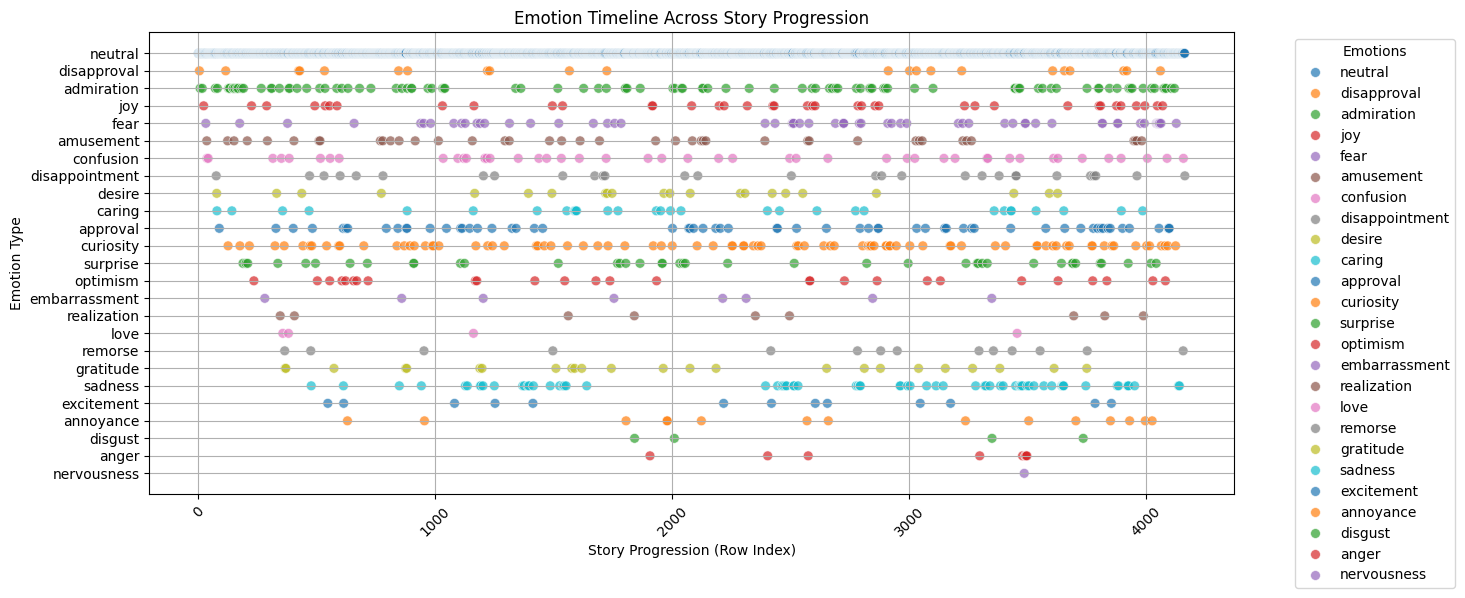

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Create scatter plot with colors for each emotion
sns.scatterplot(x=df.index, y=df["Emotion_Name"], hue=df["Emotion_Name"], palette="tab10", s=50, alpha=0.7)

# Customize plot appearance
plt.title("Emotion Timeline Across Story Progression")
plt.xlabel("Story Progression (Row Index)")
plt.ylabel("Emotion Type")
plt.xticks(rotation=45)
plt.legend(title="Emotions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()


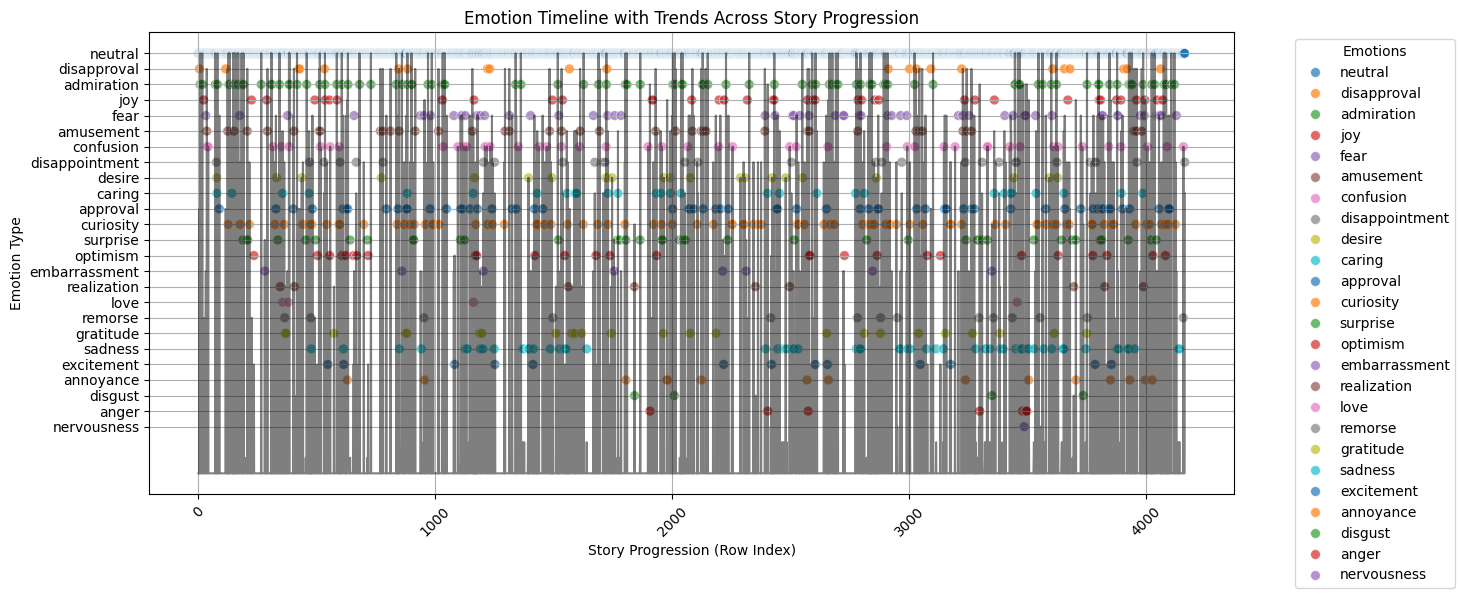

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Scatter plot with emotions as colored dots
sns.scatterplot(x=df.index, y=df["Emotion_Name"], hue=df["Emotion_Name"], palette="tab10", s=50, alpha=0.7)

# Overlay smoothed line for trends
sns.lineplot(x=df.index, y=df["Predicted_Emotion"], color="black", alpha=0.5, linewidth=1.5, estimator="mean")

# Customize plot appearance
plt.title("Emotion Timeline with Trends Across Story Progression")
plt.xlabel("Story Progression (Row Index)")
plt.ylabel("Emotion Type")
plt.xticks(rotation=45)
plt.legend(title="Emotions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


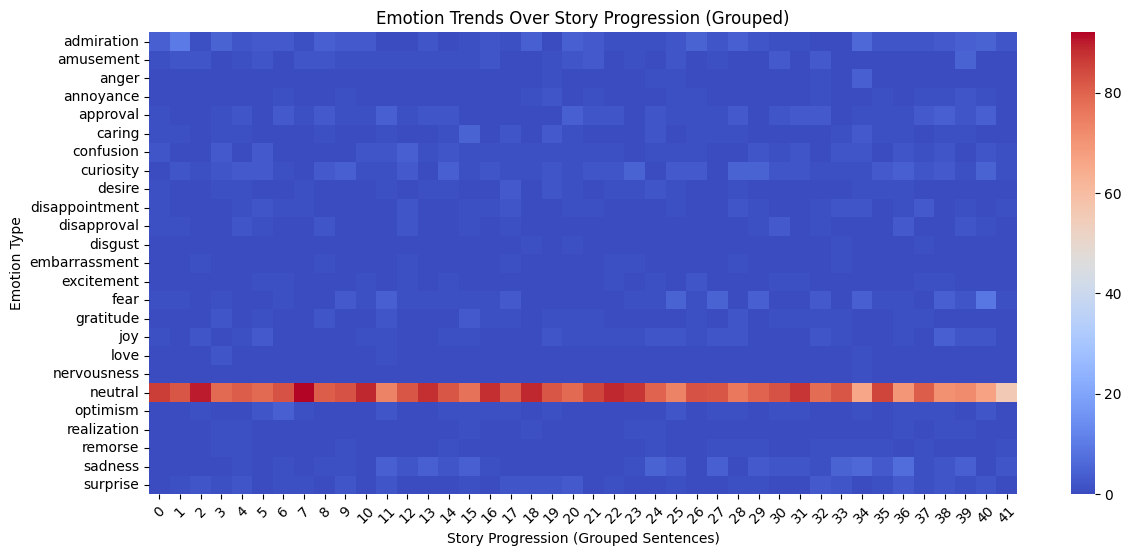

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group emotions by time chunks
df["Sentence_Group"] = df.index // 100  # Group every 100 sentences
emotion_trend = df.groupby(["Sentence_Group", "Emotion_Name"]).size().unstack().fillna(0)

# Plot grouped emotion trends
plt.figure(figsize=(14, 6))
sns.heatmap(emotion_trend.T, cmap="coolwarm", annot=False)

plt.title("Emotion Trends Over Story Progression (Grouped)")
plt.xlabel("Story Progression (Grouped Sentences)")
plt.ylabel("Emotion Type")
plt.xticks(rotation=45)
plt.show()



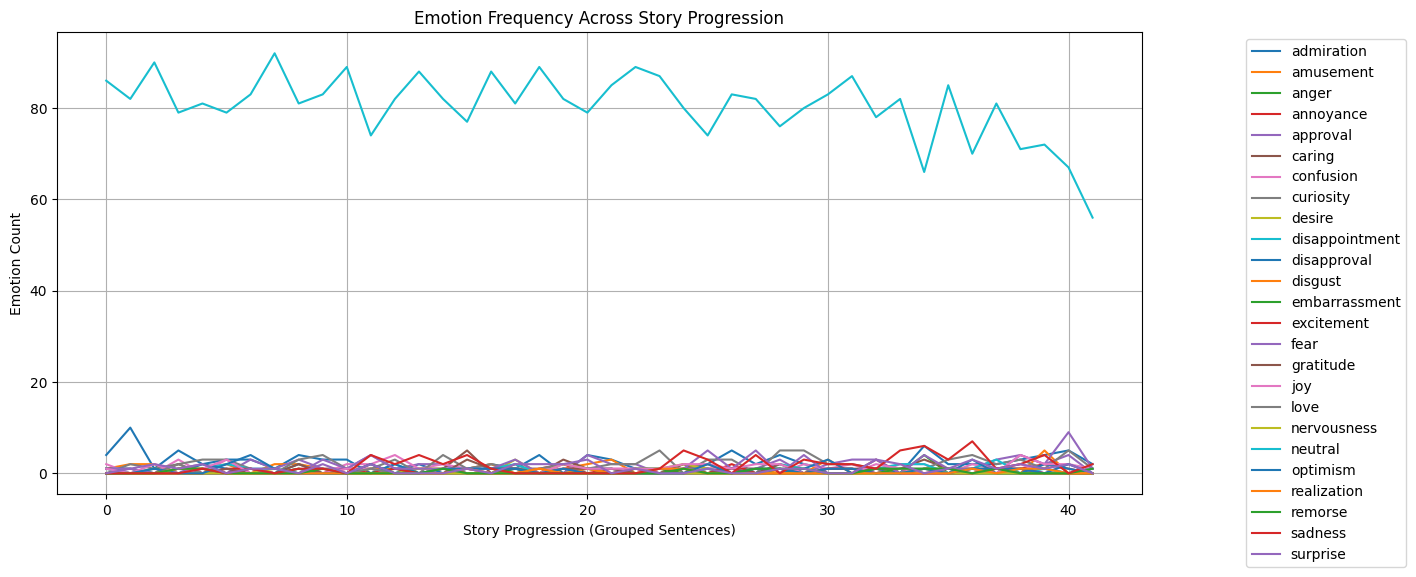

In [207]:
df["Sentence_Group"] = df.index // 100  # Group every 100 sentences
emotion_counts = df.groupby(["Sentence_Group", "Emotion_Name"]).size().unstack().fillna(0)

plt.figure(figsize=(14, 6))
for emotion in emotion_counts.columns:
    plt.plot(emotion_counts.index, emotion_counts[emotion], label=emotion)

plt.title("Emotion Frequency Across Story Progression")
plt.xlabel("Story Progression (Grouped Sentences)")
plt.ylabel("Emotion Count")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


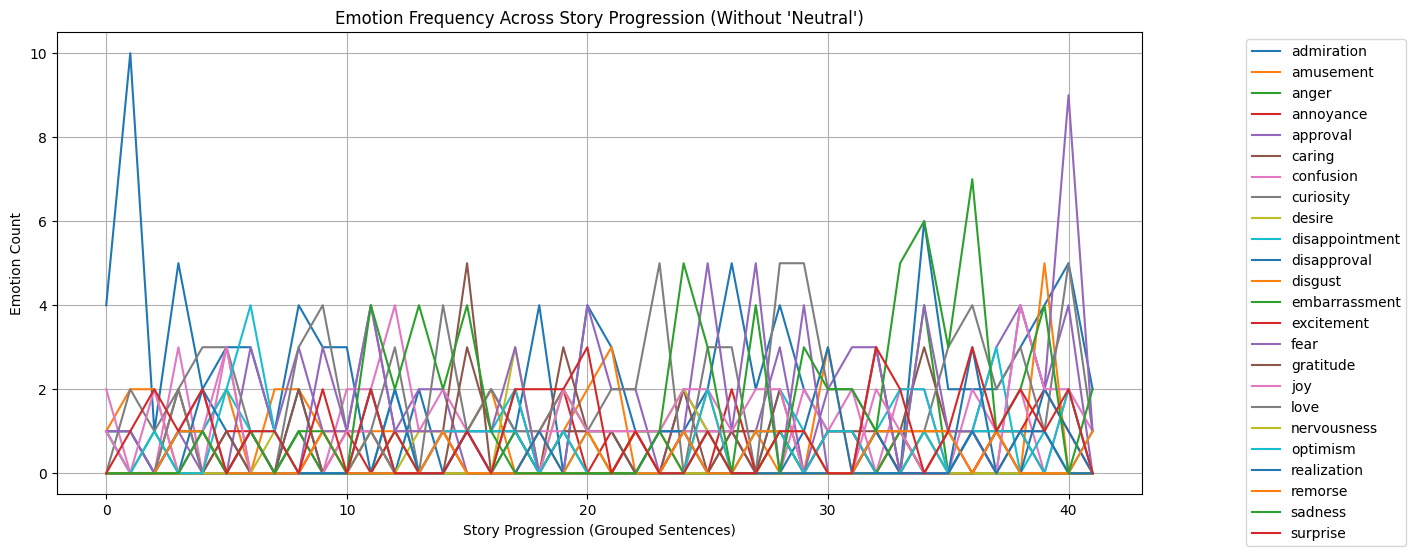

In [208]:
import matplotlib.pyplot as plt

# Remove "neutral" from emotion counts
emotion_counts_filtered = emotion_counts.drop(columns="neutral", errors="ignore")

# Plot the filtered emotions
plt.figure(figsize=(14, 6))
for emotion in emotion_counts_filtered.columns:
    plt.plot(emotion_counts_filtered.index, emotion_counts_filtered[emotion], label=emotion)

plt.title("Emotion Frequency Across Story Progression (Without 'Neutral')")
plt.xlabel("Story Progression (Grouped Sentences)")
plt.ylabel("Emotion Count")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


In [209]:
emotion_counts.drop(columns="neutral", errors="ignore")


Emotion_Name,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,fear,gratitude,joy,love,nervousness,optimism,realization,remorse,sadness,surprise
Sentence_Group,,,,,,,,,,,,,,,,,,,,,
0,4.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
3,5.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,1.0,0.0,...,1.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0
4,2.0,1.0,0.0,0.0,2.0,1.0,0.0,3.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
5,3.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,2.0,...,0.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
6,3.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
7,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,4.0,2.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


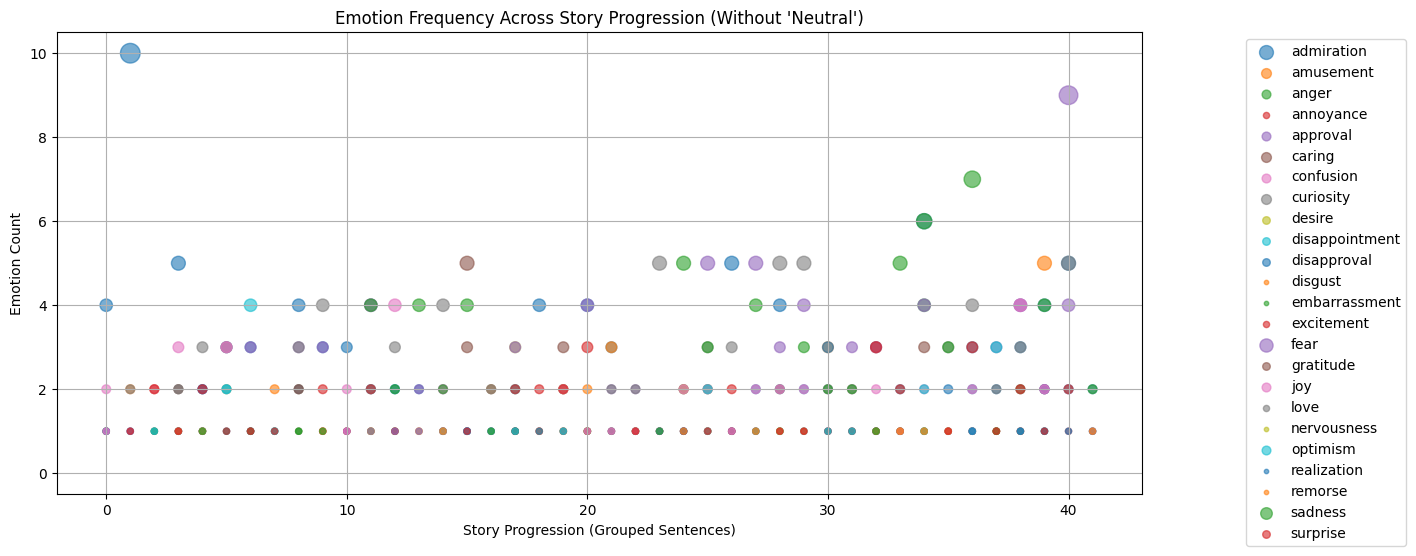

In [210]:
import matplotlib.pyplot as plt

# Remove "neutral" from emotion counts
emotion_counts_filtered = emotion_counts.drop(columns="neutral", errors="ignore")

# Create the figure
plt.figure(figsize=(14, 6))

# Initialize the Legend List
legend_handles = []

# Loop Through Each Emotion & Plot Data
# Loops through each emotion column in the dataset.

#Plots scatter points, where:

#X-axis: emotion_counts_filtered.index (story progression).

#Y-axis: emotion_counts_filtered[emotion] (emotion frequency).
# #Size (s): Makes dots larger for higher emotion counts (* 20 scales it).

#Transparency (alpha=0.6): Keeps overlapping points readable.

for emotion in emotion_counts_filtered.columns:
    scatter = plt.scatter(emotion_counts_filtered.index, emotion_counts_filtered[emotion], 
                          s=emotion_counts_filtered[emotion] * 20, alpha=0.6, label=emotion)
    legend_handles.append(scatter)  # Store the scatter plot for legend

# Add the title and labels
plt.title("Emotion Frequency Across Story Progression (Without 'Neutral')")
plt.xlabel("Story Progression (Grouped Sentences)")
plt.ylabel("Emotion Count")
plt.grid(True)

# Add the legend using the stored handles
plt.legend(handles=legend_handles, loc="upper right", bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()



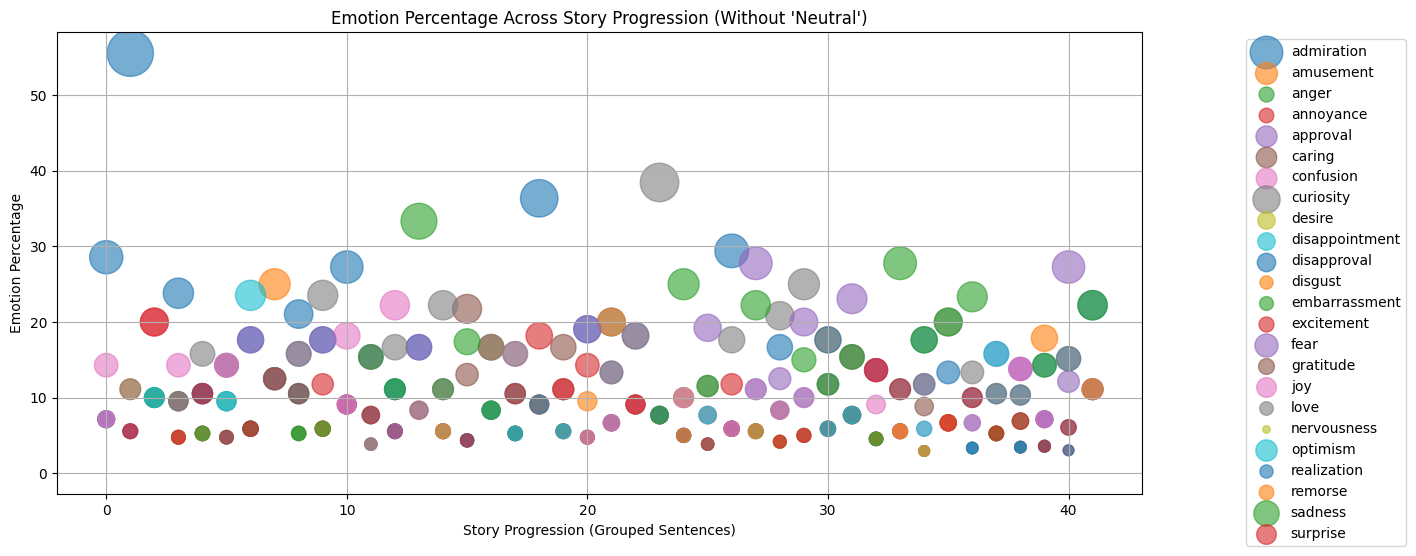

In [223]:
import matplotlib.pyplot as plt
import pandas as pd

# Remove "neutral" from emotion counts
emotion_counts_filtered = emotion_counts.drop(columns="neutral", errors="ignore")

# Convert absolute counts into percentages per sentence group
emotion_counts_percentage = emotion_counts_filtered.div(emotion_counts_filtered.sum(axis=1), axis=0) * 100

# Ensure there's data to plot
if not emotion_counts_percentage.empty:
    # Create the figure
    plt.figure(figsize=(14, 6))

    # Initialize legend handles
    legend_handles = []

    # Loop through emotions and plot their percentage trends
    for emotion in emotion_counts_percentage.columns:
        scatter = plt.scatter(emotion_counts_percentage.index, emotion_counts_percentage[emotion], 
                              s=emotion_counts_percentage[emotion] * 20, alpha=0.6, label=emotion)
        legend_handles.append(scatter)  # Store scatter for legend

    # Add titles, labels, and grid
    plt.title("Emotion Percentage Across Story Progression (Without 'Neutral')")
    plt.xlabel("Story Progression (Grouped Sentences)")
    plt.ylabel("Emotion Percentage")
    plt.grid(True)

    # Add legend
    plt.legend(handles=legend_handles, loc="upper right", bbox_to_anchor=(1.25, 1))

    # Show the plot
    plt.show()
else:
    print("No emotions available for percentage conversion.")


<Figure size 1400x600 with 0 Axes>

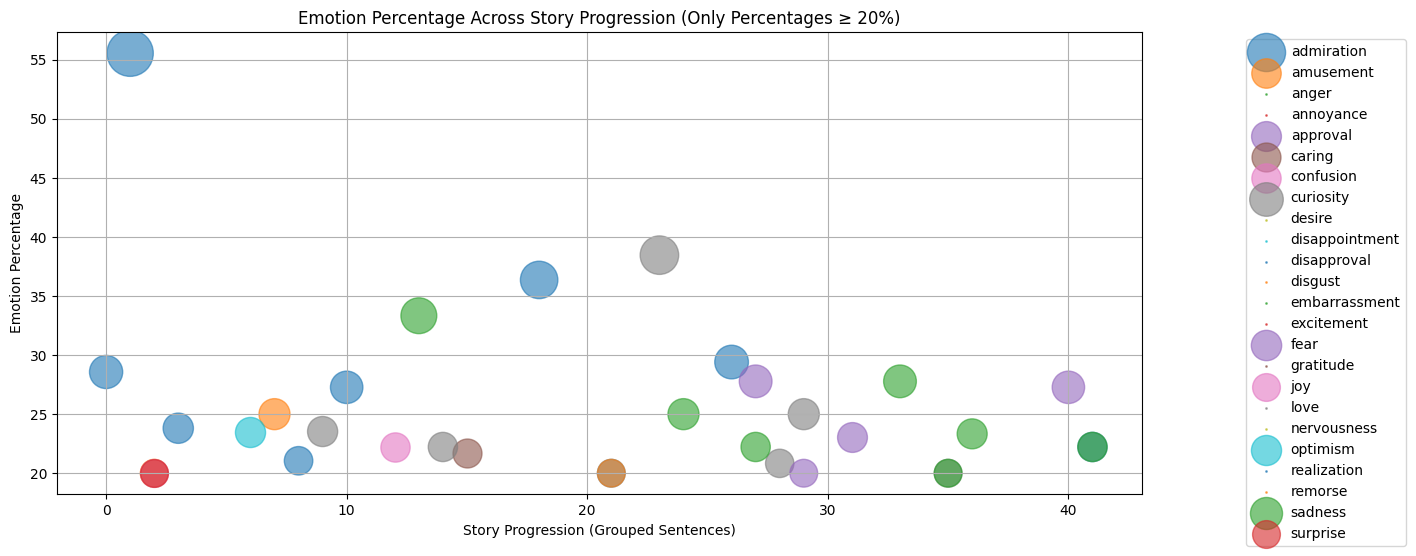

In [227]:
import matplotlib.pyplot as plt
import pandas as pd

# Remove "neutral" from emotion counts
emotion_counts_filtered = emotion_counts.drop(columns="neutral", errors="ignore")

# Convert absolute counts into percentages per sentence group
emotion_counts_percentage = emotion_counts_filtered.div(emotion_counts_filtered.sum(axis=1), axis=0) * 100

# Filter emotions where the percentage is at least 20%
emotion_counts_percentage = emotion_counts_percentage.where(emotion_counts_percentage >= 20).dropna(how="all")

# Ensure there's data to plot
if not emotion_counts_percentage.empty:
    # Create the figure
    plt.figure(figsize=(14, 6))

    # Initialize legend handles
    legend_handles = []

    # Loop through emotions and plot their percentage trends
    for emotion in emotion_counts_percentage.columns:
        filtered_counts = emotion_counts_percentage[emotion].dropna()
        scatter = plt.scatter(filtered_counts.index, filtered_counts, 
                              s=filtered_counts * 20, alpha=0.6, label=emotion)
        legend_handles.append(scatter)  # Store scatter for legend

    # Add titles, labels, and grid
    plt.title("Emotion Percentage Across Story Progression (Only Percentages ≥ 20%)")
    plt.xlabel("Story Progression (Grouped Sentences)")
    plt.ylabel("Emotion Percentage")
    plt.grid(True)

    # Add legend
    plt.legend(handles=legend_handles, loc="upper right", bbox_to_anchor=(1.25, 1))

    # Show the plot
    plt.show()
else:
    print("No emotions meet the threshold of ≥ 20%.")


In [220]:
print(df.head())

                                            Sentence  Predicted_Emotion  \
0    \nTo Sherlock Holmes she is always _the_ woman.                 27   
1  I have seldom heard him\\nmention her under an...                 27   
2  In his eyes she eclipses and\\npredominates th...                 27   
3  It was not that he felt any emotion\\nakin to ...                 27   
4  All emotions, and that one particularly,\\nwer...                 10   

  Emotion_Name  Sentence_Index  Sentence_Group           Filtered_Sentence  \
0      neutral               0               0                               
1      neutral               1               0                               
2      neutral               2               0                               
3      neutral               3               0                        love   
4  disapproval               4               0  precise admirably balanced   

  Emotion_Category             Emotional_Words  
0              NaN             

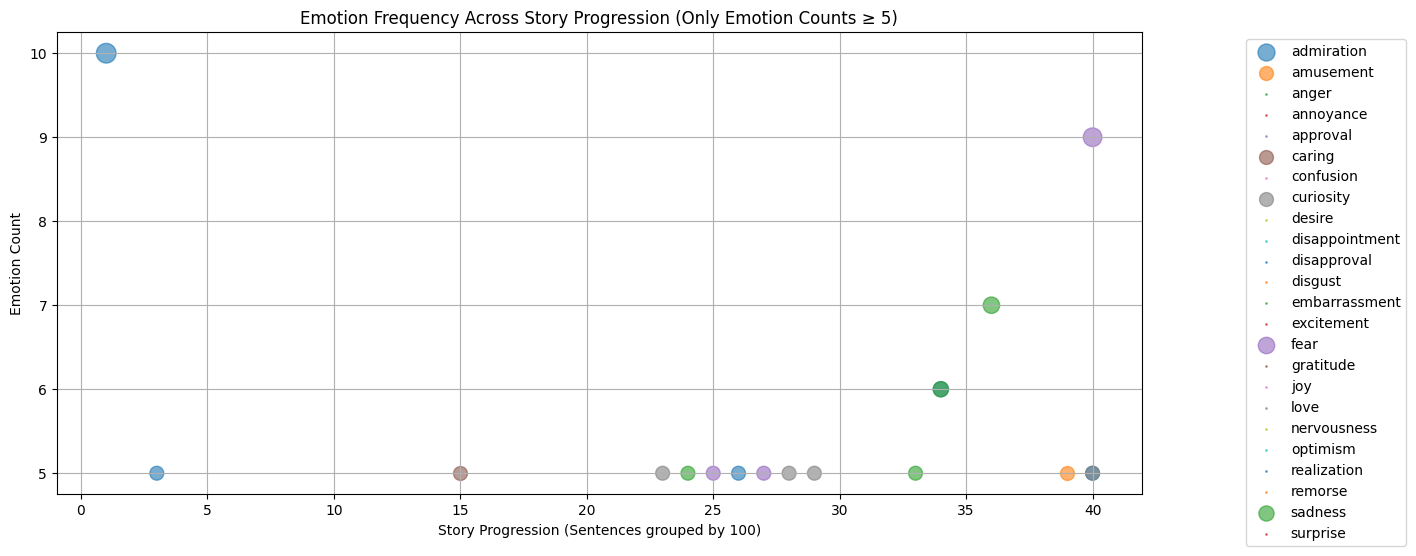

In [211]:
import matplotlib.pyplot as plt

# Remove "neutral" from emotion counts
emotion_counts_filtered = emotion_counts.drop(columns="neutral", errors="ignore")

# Filter emotions where the count is at least 3
emotion_counts_filtered = emotion_counts_filtered.where(emotion_counts_filtered >= 5).dropna(how="all")

# Ensure there's data to plot
if not emotion_counts_filtered.empty:
    # Create the figure
    plt.figure(figsize=(14, 6))

    # Initialize legend handles
    legend_handles = []

    # Loop through emotions and plot only those with count ≥ 3
    for emotion in emotion_counts_filtered.columns:
        filtered_counts = emotion_counts_filtered[emotion].dropna()
        scatter = plt.scatter(filtered_counts.index, filtered_counts, 
                              s=filtered_counts * 20, alpha=0.6, label=emotion)
        legend_handles.append(scatter)  # Store scatter for legend

    # Add titles, labels, and grid
    plt.title("Emotion Frequency Across Story Progression (Only Emotion Counts ≥ 5)")
    plt.xlabel("Story Progression (Sentences grouped by 100)")
    plt.ylabel("Emotion Count")
    plt.grid(True)

    # Add legend
    plt.legend(handles=legend_handles, loc="upper right", bbox_to_anchor=(1.25, 1))

    # Show the plot
    plt.show()


In [ ]:
# This plot visually represents how different emotions fluctuate throughout a story based on their frequency at different points in the narrative.

#Key Insights You Can Derive:
#Emotion Intensity Over Time: The size of each point reflects the count of a specific emotion, indicating strong emotional peaks or subtle shifts.

# Narrative Flow: If certain emotions cluster in specific sections, it may suggest pivotal moments in the story, such as a climax, conflict, or resolution.

#Dominant vs. Subtle Emotions: Some emotions may appear frequently while others remain rare, hinting at the overall tone of the story.

# Transitions in Mood: If emotions shift dramatically from joy to sadness, for example, it could highlight story twists or character transformations.

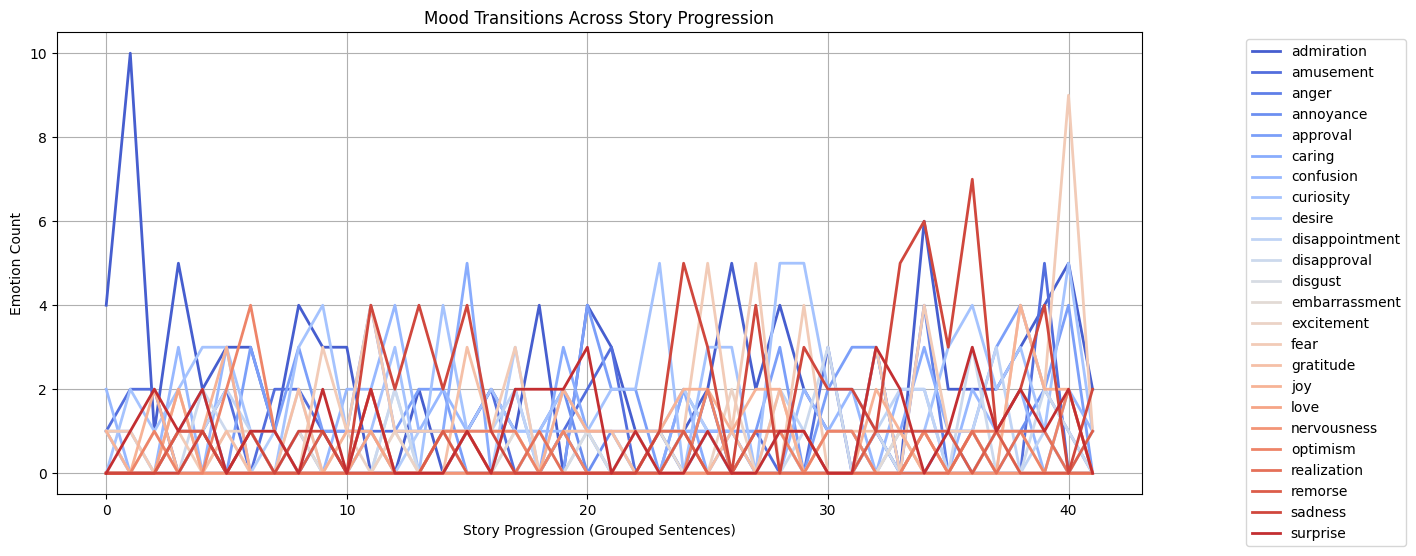

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Remove "neutral" from emotion counts
emotion_counts_filtered = emotion_counts.drop(columns="neutral", errors="ignore")

# Create the figure
plt.figure(figsize=(14, 6))

# Generate a color palette
palette = sns.color_palette("coolwarm", len(emotion_counts_filtered.columns))

# Plot each emotion with a gradient color
for i, emotion in enumerate(emotion_counts_filtered.columns):
    plt.plot(emotion_counts_filtered.index, emotion_counts_filtered[emotion], 
             label=emotion, color=palette[i], linewidth=2)

# Add titles and labels
plt.title("Mood Transitions Across Story Progression")
plt.xlabel("Story Progression (Grouped Sentences)")
plt.ylabel("Emotion Count")
plt.grid(True)
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()


In [216]:
emotion_mapping = {
    "joy": "Happiness",
    "amusement": "Happiness",
    "admiration": "Happiness",
    "love": "Happiness",
    "gratitude": "Happiness",
    "optimism": "Happiness",
    
    "disappointment": "Sadness",
    "remorse": "Sadness",
    "sadness": "Sadness",
    
    "anger": "Anger",
    "annoyance": "Anger",
    "disapproval": "Anger",
    "disgust": "Anger",
    
    "fear": "Fear",
    "nervousness": "Fear",
    
    "surprise": "Surprise",
    "realization": "Surprise",
    
    "caring": "Social",
    "curiosity": "Social",
    "excitement": "Social",
    "approval": "Social",
    "embarrassment": "Social"
}

# Apply classification to the dataframe
df["Emotion_Category"] = df["Emotion_Name"].map(emotion_mapping)


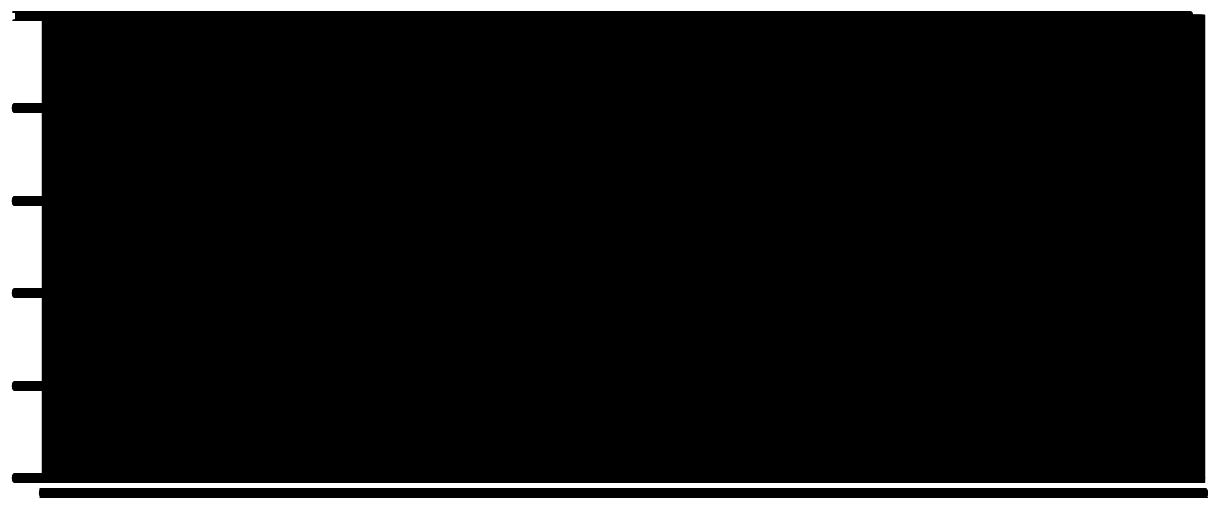

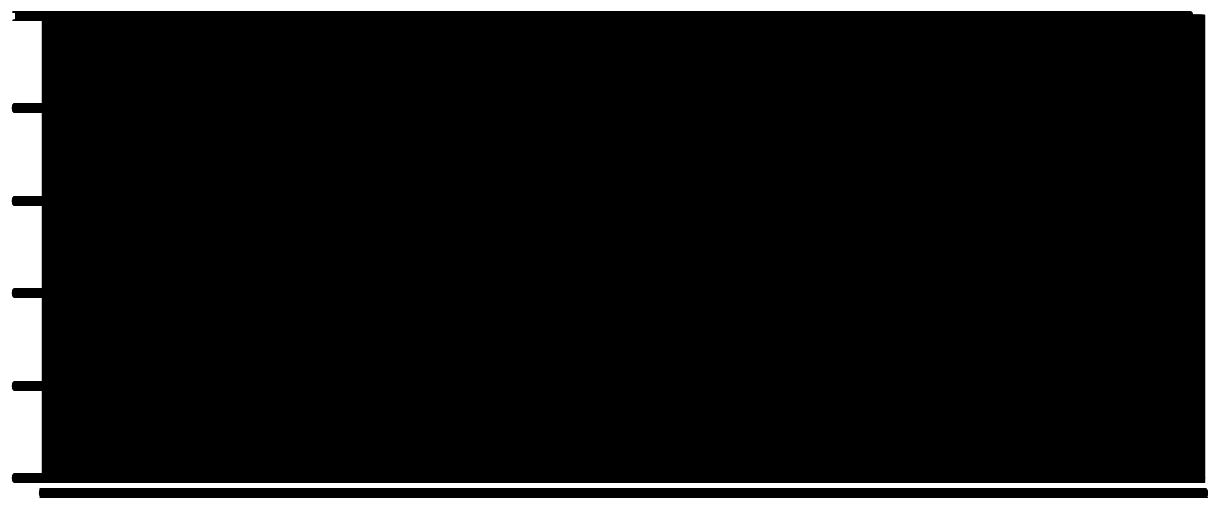

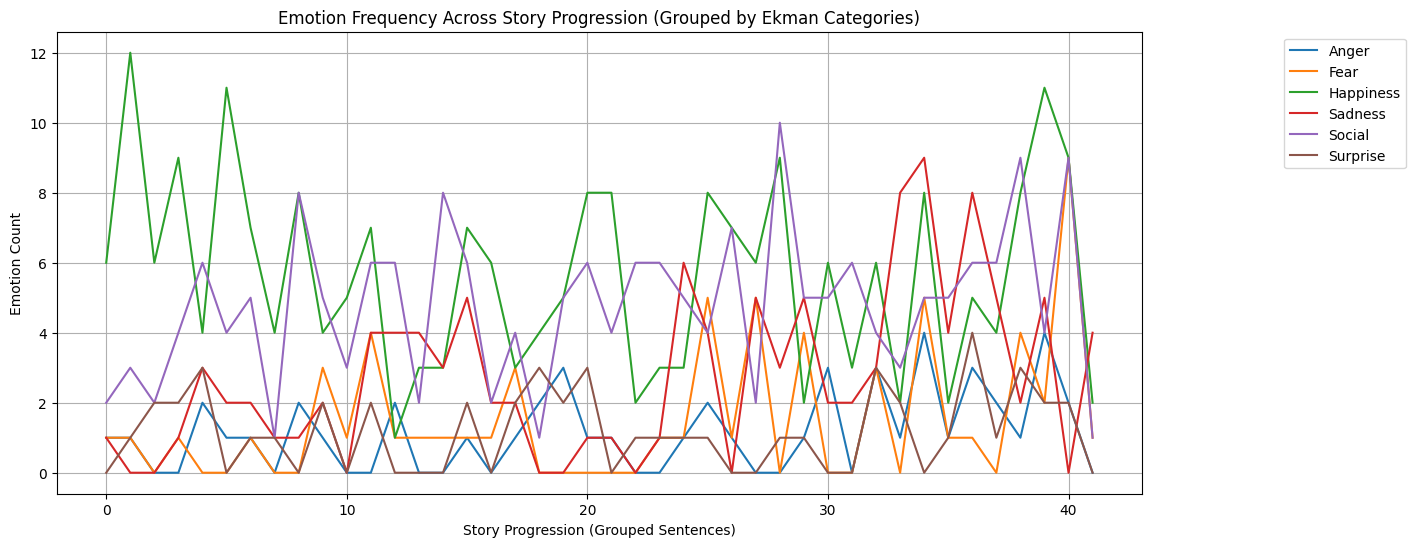

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count grouped emotions
emotion_counts_grouped = df.groupby(["Sentence_Group", "Emotion_Category"]).size().unstack().fillna(0)

# Plot the grouped trends
plt.figure(figsize=(14, 6))
for emotion in emotion_counts_grouped.columns:
    plt.plot(emotion_counts_grouped.index, emotion_counts_grouped[emotion], label=emotion)

plt.title("Emotion Frequency Across Story Progression (Grouped by Ekman Categories)")
plt.xlabel("Story Progression (Grouped Sentences)")
plt.ylabel("Emotion Count")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()
